In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from OfflineTestTrader import OfflineTestTrader
from AltBaseStrategy import BaseStrategy as Strategy

In [2]:
strategy = Strategy()
trader = OfflineTestTrader("./data/2019-1-1-BTCUSDT-5m.csv", strategy, 1000, 100)
strategy.buyTS = pd.Timestamp('2019-04-04')

In [3]:
trader.run()

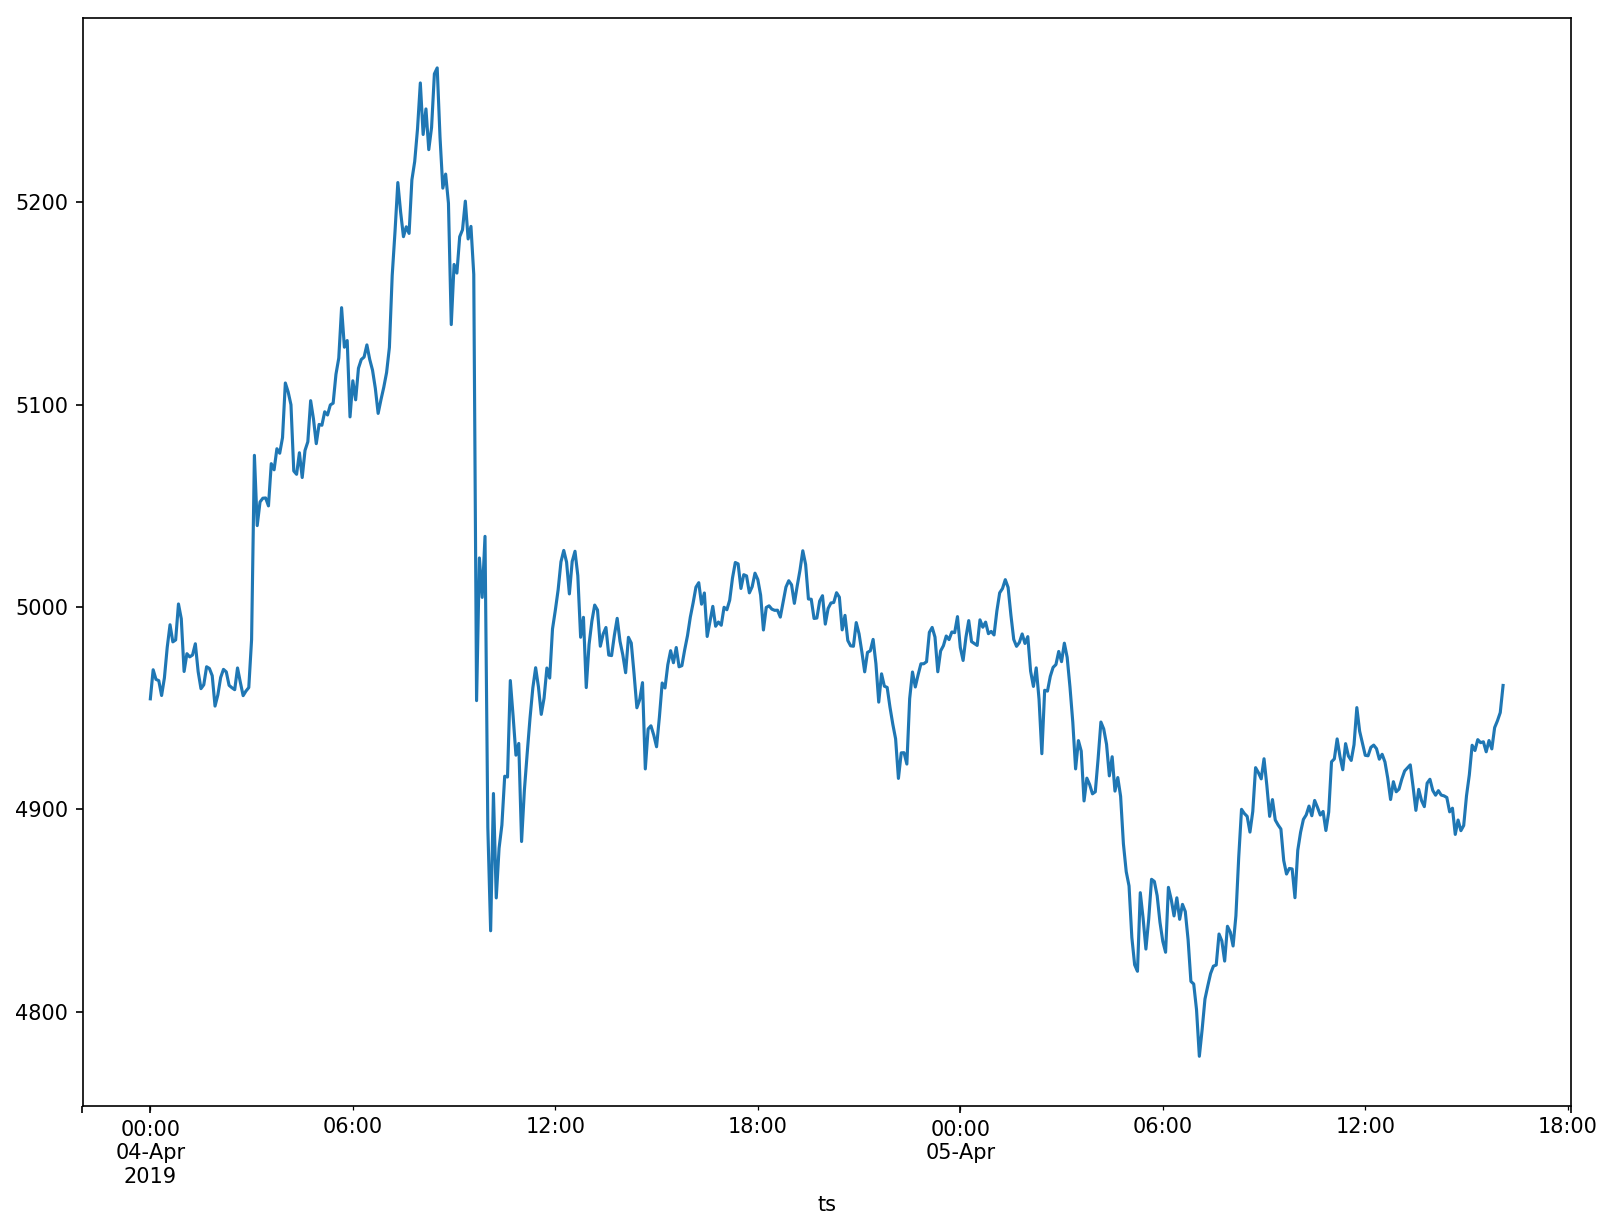

In [4]:
plt.figure(figsize=(12.8, 9.6), dpi=150)


strategy.df["close"].plot()